In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from google.colab import drive
import torch.nn.init as init

In [ ]:
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [ ]:
example_data.shape

torch.Size([1000, 1, 28, 28])

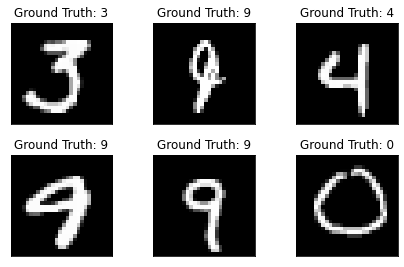

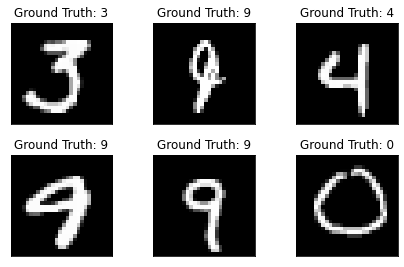

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
def random_weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1 or classname.find('Linear') != -1:
        init.xavier_normal_(m.weight, gain=1)
        init.normal_(m.bias)

In [ ]:
# net = Net()
# net.apply(random_weights_init)
# optimizer = optim.SGD(net.parameters(), lr=learning_rate,
#                       momentum=momentum)

In [ ]:
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch, train_losses, train_counter):
  net.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = net(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [ ]:
def test(test_losses):
  net.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = net(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
train_num = 20
for tr in range(train_num):
    train_losses = []
    train_counter = []
    test_losses = []
    net = Net()
    net.apply(random_weights_init)
    optimizer = optim.SGD(net.parameters(), lr=learning_rate,
                        momentum=momentum)
    print('Model {0}'.format(tr+1))
    for epoch in range(1, n_epochs + 1):
        train(epoch, train_losses, train_counter)
        test(test_losses)

    torch.save(net.state_dict(), '/drive/My Drive/BIA_MnistTrained/model_{0}.pth'.format(tr))
    # torch.save(optimizer.state_dict(), '/results/optimizer.pth')

Model 1
Train Epoch: 1 [0/60000 (0%)]	Loss: 4.281819


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [640/60000 (1%)]	Loss: 2.510120
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.317354
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.434712
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.465347
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.160582
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.181916
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.112489
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.156779
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.054456
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.076739
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.924054
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.727474
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.954767
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.702814
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.481554
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.438650
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.652600
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.583931
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.398502
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.415148
Train Epoch: 1 [13440/60

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Streaming output truncated to the last 5000 lines.
Train Epoch: 3 [39040/60000 (65%)]	Loss: 0.368343
Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.318265
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.308987
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.448475
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.395950
Train Epoch: 3 [42240/60000 (70%)]	Loss: 0.328196
Train Epoch: 3 [42880/60000 (71%)]	Loss: 0.243139
Train Epoch: 3 [43520/60000 (72%)]	Loss: 0.224249
Train Epoch: 3 [44160/60000 (74%)]	Loss: 0.276307
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.324650
Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.330106
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.155803
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.482050
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.413448
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.203258
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.467285
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.402080
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.337265
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.291537

In [ ]:
torch.save(torch.tensor(train_losses), '/drive/My Drive/BIA_MnistTrained/Model_10_train_loss.pth')